<h1> Web Scraping 

<h2> Structure </h2>
<a href='website.com'> my website</a>


[my webste](website.com)

# Web Scraping

## Structure
1. HTML pages
2. Chrome DevTools
3. BeautifulSoup: Web scraping package
4. Ethical considerations of web scraping

## What you will be able to do after the tutorial
* Inspect an HTML page and identify which parts you want to scrape.
* Scrape web pages with `requests` and `BeautifulSoup`.
* Navigate Javascript elements with `Selenium`
* Judge when web scraping is the most suitable approach and what you should consider before doing so (be a good citizen of the Internet).

## HTML page structure

**Hypertext Markup Language (HTML)** is the standard markup language for documents designed to be displayed in a web browser. HTML describes the structure of a web page and it can be used with **Cascading Style Sheets (CSS)** and a scripting language such as **JavaScript** to create interactive websites. HTML consists of a series of elements that "tell" to the browser how to display the content. Lastly, elements are represented by **tags**.

Here are some tags:
* `<!DOCTYPE html>` declaration defines this document to be HTML5.  
* `<html>` element is the root element of an HTML page.  
* `<div>` tag defines a division or a section in an HTML document. It's usually a container for other elements.
* `<head>` element contains meta information about the document.  
* `<title>` element specifies a title for the document.  
* `<body>` element contains the visible page content.  
* `<h1>` element defines a large heading.  
* `<p>` element defines a paragraph.  
* `<a>` element defines a hyperlink.

HTML tags normally come in pairs like `<p>` and `</p>`. The first tag in a pair is the opening tag, the second tag is the closing tag. The end tag is written like the start tag, but with a slash inserted before the tag name.

<img src="../../../images/scraping/tags.png" width="512">


HTML has a tree-like 🌳 🌲 structure. Here's how a very simple HTML tree looks like.

<img src="../../../images/scraping/dom_tree.gif">

### Creating a simple HTML page

In [2]:
from IPython.display import display, HTML

In [3]:
display(HTML("""
<!DOCTYPE html>
<html lang="en" dir="ltr">
<head>
  <title>Intro to HTML</title>
</head>

<body>
  <h1>Heading h1</h1>
  <h2>Heading h2</h2>
  <h3>Heading h3</h3>
  <h4>Heading h4</h4>

  <p>
    That's a text paragraph. You can also <b>bold</b>, <mark>mark</mark>, <ins>underline</ins>, <del>strikethrough</del> and <i>emphasize</i> words.
    You can also add links - here's one to <a href="https://www.linkedin.com/company/tuwaiqacademy/">Tuwaiq Academy</a>.
  </p>

  <p>
    This <br> is a paragraph <br> with <br> line breaks
  </p>

  <p style="color:red">
    Add colour to your paragraphs.
  </p>

  <p>Unordered list:</p>
  <ul>
    <li>Python</li>
    <li>R</li>
    <li>Julia</li>
  </ul>

  <p>Ordered list:</p>
  <ol>
    <li>Data collection</li>
    <li>Exploratory data analysis</li>
    <li>Data analysis</li>
  </ol>
  <hr>

  <!-- This is a comment -->

</body>
</html>
"""))

## Chrome DevTools

[Chrome DevTools](https://developers.google.com/web/tools/chrome-devtools/) is a set of web developer tools built directly into the Google Chrome browser. DevTools can help you view and edit web pages. We will use Chrome's tool to inspect an HTML page and find which elements correspond to the data we might want to scrape.

### Short exercise
To get some experience with the HTML page structure and Chrome DevTools, we will search and locate elements in [IMDB](https://www.imdb.com/).

**Tip**: Hit *Command+Option+C* (Mac) or *Control+Shift+C* (Windows, Linux) to access the elements panel.

#### Tasks (we will do them together)
* Find the _Sign in_ button
* Find the IMDB logo.
* What is the _heading_ size of the *Top 10 on IMDb this week* in the main section of the page?

## Web Scraping with `requests` and `BeautifulSoup`

We will use `requests` and `BeautifulSoup` to access and scrape the content of [IMDB's homepage](https://www.imdb.com).

### What is `BeautifulSoup`?

It is a Python library for pulling data out of HTML and XML files. It provides methods to navigate the document's tree structure that we discussed before and scrape its content.

### Our pipeline
<img src='../../../images/scraping/boxofficemojo-pipeline.png' width="1024">

In [14]:
import requests

oil_pg = requests.get('https://www.othaimmarkets.com/grocery/oils-ghee.html')

In [15]:
oil_pg

<Response [200]>

In [16]:
oil_pg.status_code

200

In [17]:
oil_pg.text

'<!doctype html>\n<html lang="ar">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n<title>زيوت وسمن - غذائية</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="viewport" content="width=device-width, initial-scale=1">\n\n<meta name="description" content="Abdullah AlOthaim Markets - أسواق عبدالله العثيم"/>\n<meta name="keywords" content="Abdullah AlOthaim Markets , أسواق عبدالله العثيم\r\n\r\n"/>\n<!--<meta http-equiv="Content-Security-Policy" content="default-src \'self\' https://www.googletagmanager.com/gtm.js https://www.othaimmarkets.com https://code.jquery.com https://www.google-analytics.com https://www.googleadservices.com https://sc-static.net/ https://fonts.googleapis.com  style-src  \'self\' \'unsafe-inline\' script-src \'self\' navigate-to \'self\' \'unsafe-allow-redirects\';">-->\n<meta name="robots" content="INDEX,FOLLOW"/>\n<meta name="facebook-domain-verification" content="ubgv6c3cdek00bw4hv9hxupk5j43qv" />\n<link r

In [18]:
type(oil_pg.text)

str

In [23]:
oil_pg.text.title

<function str.title()>

In [20]:
from bs4 import BeautifulSoup

othaim_soup = BeautifulSoup(oil_pg.text, 'html.parser')

In [21]:
type(othaim_soup)

bs4.BeautifulSoup

In [22]:
othaim_soup.title

<title>زيوت وسمن - غذائية</title>

In [24]:
othaim_soup.title.text

'زيوت وسمن - غذائية'

In [29]:
first_prod = othaim_soup.find('div', {'class':'span2 product'})
first_prod

<div class="span2 product">
<div class="product-image-wrapper nohover">
<div class="label_new_top_left">جديد</div>
<a href="http://www.othaimmarkets.com/grocery/oils-ghee/afia-corn-oil-1-8l.html"><img alt="زيت عافية ذرة 1,8لتر" class="product-retina" data-image2x="https://www.othaimmarkets.com/media/catalog/product/cache/4/small_image/340x330/9df78eab33525d08d6e5fb8d27136e95/2/2/229545.jpg" height="165" src="https://www.othaimmarkets.com/media/catalog/product/cache/4/small_image/170x165/9df78eab33525d08d6e5fb8d27136e95/2/2/229545.jpg" width="170"/></a>
</div> <div class="wrapper-hover">
<h3 class="product-name"><a href="http://www.othaimmarkets.com/grocery/oils-ghee/afia-corn-oil-1-8l.html">زيت عافية ذرة 1,8لتر</a></h3>
<div class="wrapper">
<div class="price-box">
<span class="regular-price" id="product-price-977">
<span class="price">30.95</span> </span>
</div>
<div class="product-tocart"><a onclick="setLocationAjax('http://www.othaimmarkets.com/checkout/cart/add/uenc/aHR0cHM6Ly93d3c

In [38]:
extract_product_details(first_prod)

('زيت عافية ذرة 1,8لتر', '30.95', None)

In [40]:
oil_prod_lst = othaim_soup.find_all('div', {'class':'span2 product'})

oil_prod_lst 

[<div class="span2 product">
 <div class="product-image-wrapper nohover">
 <div class="label_new_top_left">جديد</div>
 <a href="http://www.othaimmarkets.com/grocery/oils-ghee/afia-corn-oil-1-8l.html"><img alt="زيت عافية ذرة 1,8لتر" class="product-retina" data-image2x="https://www.othaimmarkets.com/media/catalog/product/cache/4/small_image/340x330/9df78eab33525d08d6e5fb8d27136e95/2/2/229545.jpg" height="165" src="https://www.othaimmarkets.com/media/catalog/product/cache/4/small_image/170x165/9df78eab33525d08d6e5fb8d27136e95/2/2/229545.jpg" width="170"/></a>
 </div> <div class="wrapper-hover">
 <h3 class="product-name"><a href="http://www.othaimmarkets.com/grocery/oils-ghee/afia-corn-oil-1-8l.html">زيت عافية ذرة 1,8لتر</a></h3>
 <div class="wrapper">
 <div class="price-box">
 <span class="regular-price" id="product-price-977">
 <span class="price">30.95</span> </span>
 </div>
 <div class="product-tocart"><a onclick="setLocationAjax('http://www.othaimmarkets.com/checkout/cart/add/uenc/aHR

In [41]:
len(oil_prod_lst )

18

In [43]:
othaim_soup.find_all('div', {'class':'span2 product'})
for product in oil_prod_lst:
    print(extract_product_details(product))

('زيت عافية ذرة 1,8لتر', '30.95', None)
('زيت هالي نباتي علب 16لتر', '105.00', None)
('زيت زيتون كوبوليفا زجاج 500مل', '25.95', None)
('زيت زيتون كوبوليفا زجاج 250مل', 'Special Price\n\n                    11.95', '14.95')
('زيت زيتون الجوف زجاج 250مل', 'Special Price\n\n                    13.45', '15.95')
('زيت زيتون ار اف بكر 2لتر', '72.95', None)
('زيت زيتون ار اف بكر زجاج 500مل', '17.50', None)
('زيت زيتون ساسو علب 400مل', '32.95', None)
('زيت زيتون ساسو علب 175مل', '15.95', None)
('زيت زيتون الوزير زجاج 500مل', 'Special Price\n\n                    21.95', '23.95')
('سمن مازولا نباتي زبدة 2لتر', '54.95', None)
('زيت زيتون ار اس زجاج 500مل', '25.50', None)
('سمن مازولا زبدة نباتي 1لتر', '28.95', None)
('سمن ديلكو شوكة وملعقة 900 جرام', 'Special Price\n\n                    19.95', '23.95')
('نخيل زيت نباتي للقلي ١٫٥ لتر', '17.95', None)
('زيت نور دوار الشمس 1.8لتر', 'Special Price\n\n                    19.95', '27.95')
('زيت زيتون السوسن بكر علب 800مل', '32.95', None)
('زيت زيتون

In [44]:
prod_details = []
for product in oil_prod_lst:
    prod_details.append(extract_product_details(product))

In [45]:
prod_details

[('زيت عافية ذرة 1,8لتر', '30.95', None),
 ('زيت هالي نباتي علب 16لتر', '105.00', None),
 ('زيت زيتون كوبوليفا زجاج 500مل', '25.95', None),
 ('زيت زيتون كوبوليفا زجاج 250مل',
  'Special Price\n\n                    11.95',
  '14.95'),
 ('زيت زيتون الجوف زجاج 250مل',
  'Special Price\n\n                    13.45',
  '15.95'),
 ('زيت زيتون ار اف بكر 2لتر', '72.95', None),
 ('زيت زيتون ار اف بكر زجاج 500مل', '17.50', None),
 ('زيت زيتون ساسو علب 400مل', '32.95', None),
 ('زيت زيتون ساسو علب 175مل', '15.95', None),
 ('زيت زيتون الوزير زجاج 500مل',
  'Special Price\n\n                    21.95',
  '23.95'),
 ('سمن مازولا نباتي زبدة 2لتر', '54.95', None),
 ('زيت زيتون ار اس زجاج 500مل', '25.50', None),
 ('سمن مازولا زبدة نباتي 1لتر', '28.95', None),
 ('سمن ديلكو شوكة وملعقة 900 جرام',
  'Special Price\n\n                    19.95',
  '23.95'),
 ('نخيل زيت نباتي للقلي ١٫٥ لتر', '17.95', None),
 ('زيت نور دوار الشمس 1.8لتر',
  'Special Price\n\n                    19.95',
  '27.95'),
 ('زيت زي

In [48]:
import pandas as pd

df = pd.DataFrame(prod_details, columns=['prod_name', 'price', 'old_price'])
df

,prod_name,price,old_price
0,"زيت عافية ذرة 1,8لتر",30.95,None
1,زيت هالي نباتي علب 16لتر,105.00,None
2,زيت زيتون كوبوليفا زجاج 500مل,25.95,None
3,زيت زيتون كوبوليفا زجاج 250مل,Special Price\n\n 11.95,14.95
4,زيت زيتون الجوف زجاج 250مل,Special Price\n\n 13.45,15.95
5,زيت زيتون ار اف بكر 2لتر,72.95,None
6,زيت زيتون ار اف بكر زجاج 500مل,17.50,None
7,زيت زيتون ساسو علب 400مل,32.95,None
8,زيت زيتون ساسو علب 175مل,15.95,None
9,زيت زيتون الوزير زجاج 500مل,Special Price\n\n 21.95,23.95


In [59]:
df

,prod_name,price,old_price
0,"زيت عافية ذرة 1,8لتر",30.95,None
1,زيت هالي نباتي علب 16لتر,105.00,None
2,زيت زيتون كوبوليفا زجاج 500مل,25.95,None
3,زيت زيتون كوبوليفا زجاج 250مل,11.95,14.95
4,زيت زيتون الجوف زجاج 250مل,13.45,15.95
5,زيت زيتون ار اف بكر 2لتر,72.95,None
6,زيت زيتون ار اف بكر زجاج 500مل,17.50,None
7,زيت زيتون ساسو علب 400مل,32.95,None
8,زيت زيتون ساسو علب 175مل,15.95,None
9,زيت زيتون الوزير زجاج 500مل,21.95,23.95


In [60]:
df.to_csv("sun_sleeping_boring.csv")

In [58]:
df['price']

0      30.95
1     105.00
2      25.95
3      11.95
4      13.45
5      72.95
6      17.50
7      32.95
8      15.95
9      21.95
10     54.95
11     25.50
12     28.95
13     19.95
14     17.95
15     19.95
16     32.95
17     19.95
Name: price, dtype: object

In [57]:
df['price'] = df['price'].str.replace("Special Price\n\n", "").str.strip()

In [32]:
first_prod.h3

<h3 class="product-name"><a href="http://www.othaimmarkets.com/grocery/oils-ghee/afia-corn-oil-1-8l.html">زيت عافية ذرة 1,8لتر</a></h3>

In [33]:
first_prod.h3.text

'زيت عافية ذرة 1,8لتر'

In [35]:
first_prod.find('span', {'class':'price'})

<span class="price">30.95</span>

In [36]:
first_prod.find('span', {'class':'price'}).text

'30.95'

In [26]:
othaim_soup.find_all('div', {'class':'span2 product'})

[<div class="span2 product">
 <div class="product-image-wrapper nohover">
 <div class="label_new_top_left">جديد</div>
 <a href="http://www.othaimmarkets.com/grocery/oils-ghee/afia-corn-oil-1-8l.html"><img alt="زيت عافية ذرة 1,8لتر" class="product-retina" data-image2x="https://www.othaimmarkets.com/media/catalog/product/cache/4/small_image/340x330/9df78eab33525d08d6e5fb8d27136e95/2/2/229545.jpg" height="165" src="https://www.othaimmarkets.com/media/catalog/product/cache/4/small_image/170x165/9df78eab33525d08d6e5fb8d27136e95/2/2/229545.jpg" width="170"/></a>
 </div> <div class="wrapper-hover">
 <h3 class="product-name"><a href="http://www.othaimmarkets.com/grocery/oils-ghee/afia-corn-oil-1-8l.html">زيت عافية ذرة 1,8لتر</a></h3>
 <div class="wrapper">
 <div class="price-box">
 <span class="regular-price" id="product-price-977">
 <span class="price">30.95</span> </span>
 </div>
 <div class="product-tocart"><a onclick="setLocationAjax('http://www.othaimmarkets.com/checkout/cart/add/uenc/aHR

In [19]:
# Imports
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# othaim's oils
othaim_url = 'https://www.othaimmarkets.com/grocery/oils-ghee.html'

# Use requests to retrieve data from a given URL
othaim_response = requests.get(othaim_url)

In [6]:
othaim_response

<Response [200]>

<img src='../../../images/scraping/200.jpg' width="1024">
<br/>


`<Response [200]>` is like getting a thumbs-up from the website you asked for information. It means your request went through smoothly, and you're getting the data you wanted. If you see numbers in the 400s, it's like the website saying, "Sorry, we couldn't find what you're looking for." You can find more about these status codes and what they mean [here](https://http.cat/).

Let's take a look at the returned data:

In [7]:
othaim_response.text

'<!doctype html>\n<html lang="ar">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n<title>زيوت وسمن - غذائية</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="viewport" content="width=device-width, initial-scale=1">\n\n<meta name="description" content="Abdullah AlOthaim Markets - أسواق عبدالله العثيم"/>\n<meta name="keywords" content="Abdullah AlOthaim Markets , أسواق عبدالله العثيم\r\n\r\n"/>\n<!--<meta http-equiv="Content-Security-Policy" content="default-src \'self\' https://www.googletagmanager.com/gtm.js https://www.othaimmarkets.com https://code.jquery.com https://www.google-analytics.com https://www.googleadservices.com https://sc-static.net/ https://fonts.googleapis.com  style-src  \'self\' \'unsafe-inline\' script-src \'self\' navigate-to \'self\' \'unsafe-allow-redirects\';">-->\n<meta name="robots" content="INDEX,FOLLOW"/>\n<meta name="facebook-domain-verification" content="ubgv6c3cdek00bw4hv9hxupk5j43qv" />\n<link r

We get messy data back with a lot of html code. It's hard to find what we need. But if we turn it into soup (not soup in a bowl), we can easily pick out what we want using HTML tags.

In [45]:
# Parse the whole HTML page using BeautifulSoup
othaim_soup = BeautifulSoup(othaim_response.text, 'html.parser')

Now we can easily pick what we want using HTML tags:

In [47]:
# Title of the parsed page
othaim_soup.title

<title>زيوت وسمن - غذائية</title>

In [49]:
# We can also get it without the HTML tags
othaim_soup.title.string

'زيوت وسمن - غذائية'

### Collect products' name and price

In [59]:
first_product = othaim_soup.find('div', {'class':'span2 product'})
first_product

<div class="span2 product">
<div class="product-image-wrapper nohover">
<div class="label_new_top_left">جديد</div>
<a href="http://www.othaimmarkets.com/grocery/oils-ghee/afia-corn-oil-1-8l.html"><img alt="زيت عافية ذرة 1,8لتر" class="product-retina" data-image2x="https://www.othaimmarkets.com/media/catalog/product/cache/4/small_image/340x330/9df78eab33525d08d6e5fb8d27136e95/2/2/229545.jpg" height="165" src="https://www.othaimmarkets.com/media/catalog/product/cache/4/small_image/170x165/9df78eab33525d08d6e5fb8d27136e95/2/2/229545.jpg" width="170"/></a>
</div> <div class="wrapper-hover">
<h3 class="product-name"><a href="http://www.othaimmarkets.com/grocery/oils-ghee/afia-corn-oil-1-8l.html">زيت عافية ذرة 1,8لتر</a></h3>
<div class="wrapper">
<div class="price-box">
<span class="regular-price" id="product-price-977">
<span class="price">30.95</span> </span>
</div>
<div class="product-tocart"><a onclick="setLocationAjax('http://www.othaimmarkets.com/checkout/cart/add/uenc/aHR0cHM6Ly93d3c

We can use `prettify()` method to make the HTML or XML code more readable by adding indentation and line breaks. It formats the structure of the document in a visually appealing way, making it easier for humans to understand.

In [61]:
print(first_product.prettify())

<div class="span2 product">
 <div class="product-image-wrapper nohover">
  <div class="label_new_top_left">
   جديد
  </div>
  <a href="http://www.othaimmarkets.com/grocery/oils-ghee/afia-corn-oil-1-8l.html">
   <img alt="زيت عافية ذرة 1,8لتر" class="product-retina" data-image2x="https://www.othaimmarkets.com/media/catalog/product/cache/4/small_image/340x330/9df78eab33525d08d6e5fb8d27136e95/2/2/229545.jpg" height="165" src="https://www.othaimmarkets.com/media/catalog/product/cache/4/small_image/170x165/9df78eab33525d08d6e5fb8d27136e95/2/2/229545.jpg" width="170"/>
  </a>
 </div>
 <div class="wrapper-hover">
  <h3 class="product-name">
   <a href="http://www.othaimmarkets.com/grocery/oils-ghee/afia-corn-oil-1-8l.html">
    زيت عافية ذرة 1,8لتر
   </a>
  </h3>
  <div class="wrapper">
   <div class="price-box">
    <span class="regular-price" id="product-price-977">
     <span class="price">
      30.95
     </span>
    </span>
   </div>
   <div class="product-tocart">
    <a onclick="set

Let's extract the **product name:**

In [106]:
first_product.find('h3', class_='product-name')

<h3 class="product-name"><a href="http://www.othaimmarkets.com/grocery/oils-ghee/afia-corn-oil-1-8l.html">زيت عافية ذرة 1,8لتر</a></h3>

We aren't interested in the HTML details. Instead, We'll focus on extracting the *text*

In [107]:
first_product.find('h3', class_='product-name').text

'زيت عافية ذرة 1,8لتر'

We'll do the same with the **price**. However, it's important to note that some products may have special offers, in such cases, we'll need to extract both the *regular price* and the *special price*.

In [111]:
first_product.find('p', class_='special-price')

No special price here but there are regular price

In [112]:
first_product.find('span', class_='regular-price')

<span class="regular-price" id="product-price-977">
<span class="price">30.95</span> </span>

In [115]:
first_product.find('span', class_='regular-price').text

'\n30.95 '

We can use `strip` to remove `\n` or any other extra spaces 

In [116]:
first_product.find('span', class_='regular-price').text.strip()

'30.95'

Let's put all in one function

In [37]:
def extract_product_details(prod):
    # Extract product name
    product_name = prod.find('h3', class_='product-name').text.strip()
    
    # Extract price
    price_element = prod.find('p', class_='special-price')
    price = price_element.text.strip() if price_element else prod.find('span', class_='regular-price').text.strip()
    
    # Extract old price if available
    old_price_element = prod.find('span', class_='price', id=lambda x: x and x.startswith('old-price'))
    old_price = old_price_element.text.strip() if old_price_element else None
    
    return product_name, price, old_price
    

We will use the `.find_all()` method to search the HTML tree for particular tags and get a `list` with all the products.

In [69]:
products = othaim_soup.find_all('div', {'class':'span2 product'})
products

[<div class="span2 product">
 <div class="product-image-wrapper nohover">
 <div class="label_new_top_left">جديد</div>
 <a href="http://www.othaimmarkets.com/grocery/oils-ghee/afia-corn-oil-1-8l.html"><img alt="زيت عافية ذرة 1,8لتر" class="product-retina" data-image2x="https://www.othaimmarkets.com/media/catalog/product/cache/4/small_image/340x330/9df78eab33525d08d6e5fb8d27136e95/2/2/229545.jpg" height="165" src="https://www.othaimmarkets.com/media/catalog/product/cache/4/small_image/170x165/9df78eab33525d08d6e5fb8d27136e95/2/2/229545.jpg" width="170"/></a>
 </div> <div class="wrapper-hover">
 <h3 class="product-name"><a href="http://www.othaimmarkets.com/grocery/oils-ghee/afia-corn-oil-1-8l.html">زيت عافية ذرة 1,8لتر</a></h3>
 <div class="wrapper">
 <div class="price-box">
 <span class="regular-price" id="product-price-977">
 <span class="price">30.95</span> </span>
 </div>
 <div class="product-tocart"><a onclick="setLocationAjax('http://www.othaimmarkets.com/checkout/cart/add/uenc/aHR

In [118]:
# Loop through the products
for prod in products:
    product_name, price, old_price = extract_product_details(prod)
    
    # Print the results
    print("Product Name:", product_name)
    print("Price:", price)
    print("Old Price:", old_price)
    print("----------")


Product Name: زيت عافية ذرة 1,8لتر
Price: 30.95
Old Price: None
----------
Product Name: زيت هالي نباتي علب 16لتر
Price: 91.00
Old Price: None
----------
Product Name: زيت زيتون كوبوليفا زجاج 500مل
Price: Special Price

                    23.95
Old Price: 25.95
----------
Product Name: زيت زيتون كوبوليفا زجاج 250مل
Price: 14.95
Old Price: None
----------
Product Name: زيت زيتون الجوف زجاج 250مل
Price: 15.95
Old Price: None
----------
Product Name: زيت زيتون ار اف بكر 2لتر
Price: 72.95
Old Price: None
----------
Product Name: زيت زيتون ار اف بكر زجاج 500مل
Price: 17.50
Old Price: None
----------
Product Name: زيت زيتون ساسو علب 400مل
Price: Special Price

                    23.95
Old Price: 32.95
----------
Product Name: زيت زيتون ساسو علب 175مل
Price: Special Price

                    11.95
Old Price: 15.95
----------
Product Name: زيت زيتون الوزير زجاج 500مل
Price: Special Price

                    21.50
Old Price: 23.95
----------
Product Name: سمن مازولا نباتي زبدة 2لتر
Price: 5

We've collected the data for oil products. Now, let's collect data for other categories:

In [61]:
# You can scrape these names too from the website but for simplicity we will go with hardcode
categories = ['grocery', 'fresh-and-bakery', 'frozen', 'beverage-confectionery', 'health-beauty', 'baby-needs-5', 'home-care','electronics-appliances']

In [92]:
import time

print("hello")
time.sleep(5)
print("hello after 5 seconds")


hello
hello after 5 seconds


In [82]:
prod_details = []
base_url = 'https://www.othaimmarkets.com/'
for cat in categories:
    url = base_url+cat+'.html'
    page = requests.get(url)
    
    soup =  BeautifulSoup(page.text, 'html.parser')
    prod_lst = soup.find_all('div', {'class':'span2 product'})
    for product in prod_lst:
        t = list(extract_product_details(product))
        t.append(cat)
        
        prod_details.append(t)
    

In [83]:
prod_details

[['ذرة قودي حبة ذهبية علب 196 جرام', '4.75', None, 'grocery'],
 ['زيتون كوبوليفا اسود بلا نوى150 جرام', '7.95', None, 'grocery'],
 ['زيتون حلواني اخضر بالزيت 650 جرام', '31.95', None, 'grocery'],
 ['فول حدائق كاليفورنيا خلطة لبنانية 450 جرام',
  'Special Price\n\n                    4.95',
  '6.95',
  'grocery'],
 ['فول حدائق كاليفورنيا مع فلفل 450 جرام',
  'Special Price\n\n                    4.95',
  '6.95',
  'grocery'],
 ['فول حدائق كاليفورنيا خلطة مصرية 450 جرام',
  'Special Price\n\n                    4.95',
  '6.95',
  'grocery'],
 ['فول لونا امريكي علب 450 جرام', '3.75', None, 'grocery'],
 ['فاصوليا لونا بيضاء 400 جرام', '4.25', None, 'grocery'],
 ['زيتون اليسا اسود علب 100 جرام',
  'Special Price\n\n                    5.50',
  '6.95',
  'grocery'],
 ['زيتون كوبوليفا اسود علب 100جرام', '5.75', None, 'grocery'],
 ['زيتون كوبوليفا اسود شرائح 114 جرام',
  'Special Price\n\n                    5.95',
  '8.50',
  'grocery'],
 ['حمص حدائق كاليفورنيا طحينة 400 جرام', '5.25', None, 

In [84]:
df = pd.DataFrame(prod_details, columns=['name', 'price', 'old_price', 'category'])
df

,name,price,old_price,category
0,ذرة قودي حبة ذهبية علب 196 جرام,4.75,None,grocery
1,زيتون كوبوليفا اسود بلا نوى150 جرام,7.95,None,grocery
2,زيتون حلواني اخضر بالزيت 650 جرام,31.95,None,grocery
3,فول حدائق كاليفورنيا خلطة لبنانية 450 جرام,Special Price\n\n 4.95,6.95,grocery
4,فول حدائق كاليفورنيا مع فلفل 450 جرام,Special Price\n\n 4.95,6.95,grocery
...,...,...,...,...
131,قطاعة خضار اي تي سي#ام اكس 4سي,65.00,None,electronics-appliances
132,قطاعة خضار كينوود 550,129.00,None,electronics-appliances
133,قطاعة خضار كينوود .5ل #580,139.00,None,electronics-appliances
134,سخان سندوتش كينوود بشواية 360,139.00,None,electronics-appliances


In [68]:
df['old_price'].notna()

0      False
1      False
2      False
3       True
4       True
       ...  
131    False
132    False
133    False
134    False
135    False
Name: old_price, Length: 136, dtype: bool

In [86]:
df['has_discount'] = df['old_price'].notna()
df

,name,price,old_price,category,has_discount
0,ذرة قودي حبة ذهبية علب 196 جرام,4.75,None,grocery,False
1,زيتون كوبوليفا اسود بلا نوى150 جرام,7.95,None,grocery,False
2,زيتون حلواني اخضر بالزيت 650 جرام,31.95,None,grocery,False
3,فول حدائق كاليفورنيا خلطة لبنانية 450 جرام,Special Price\n\n 4.95,6.95,grocery,True
4,فول حدائق كاليفورنيا مع فلفل 450 جرام,Special Price\n\n 4.95,6.95,grocery,True
...,...,...,...,...,...
131,قطاعة خضار اي تي سي#ام اكس 4سي,65.00,None,electronics-appliances,False
132,قطاعة خضار كينوود 550,129.00,None,electronics-appliances,False
133,قطاعة خضار كينوود .5ل #580,139.00,None,electronics-appliances,False
134,سخان سندوتش كينوود بشواية 360,139.00,None,electronics-appliances,False


In [88]:
df[df['has_discount'] == True]['category'].value_counts()

frozen                    7
home-care                 6
grocery                   5
baby-needs-5              4
beverage-confectionery    3
fresh-and-bakery          2
health-beauty             2
Name: category, dtype: int64

<AxesSubplot: >

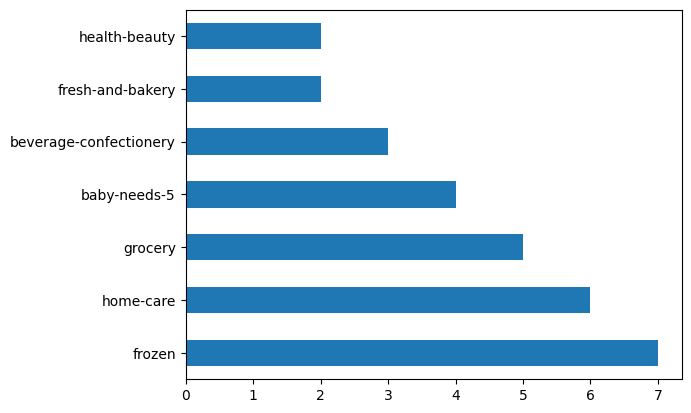

In [91]:
df[df['has_discount'] == True]['category'].value_counts().plot(kind='barh')

In [71]:
df['has_discount'].value_counts()

False    107
True      29
Name: has_discount, dtype: int64

<AxesSubplot: ylabel='has_discount'>

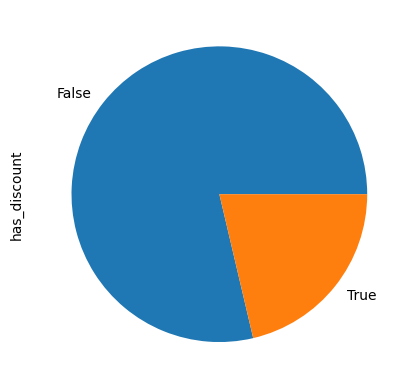

In [74]:
df['has_discount'].value_counts().plot(kind='pie')

In [73]:
df['has_discount'].value_counts(normalize=True)

False    0.786765
True     0.213235
Name: has_discount, dtype: float64

In [135]:
# othaim's website
base_url = 'https://www.othaimmarkets.com/'

# Loop through categories
for category in categories:
    # Construct the URL for the category page
    category_url = base_url + category + '.html'
    
    # Send a GET request to the category URL
    response = requests.get(category_url)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Here you can write your scraping logic to extract information from the page
        # Let's find all product names or prices
        products = soup.find_all('div', {'class':'span2 product'})
        for prod in products:
            product_name, price, old_price = extract_product_details(prod)

            # Print the results
            print("Product Name:", product_name)
            print("Price:", price)
            print("Old Price:", old_price)
            print("----------")

    else:
        print("Failed to retrieve data for category:", category)


Product Name: ذرة قودي حبة ذهبية علب 196 جرام
Price: Special Price

                    3.25
Old Price: 4.75
----------
Product Name: زيتون كوبوليفا اسود بلا نوى150 جرام
Price: 7.95
Old Price: None
----------
Product Name: زيتون حلواني اخضر بالزيت 650 جرام
Price: Special Price

                    19.95
Old Price: 31.95
----------
Product Name: فول حدائق كاليفورنيا خلطة لبنانية 450 جرام
Price: Special Price

                    4.95
Old Price: 6.95
----------
Product Name: فول حدائق كاليفورنيا مع فلفل 450 جرام
Price: Special Price

                    4.95
Old Price: 6.95
----------
Product Name: فول حدائق كاليفورنيا خلطة مصرية 450 جرام
Price: Special Price

                    4.95
Old Price: 6.95
----------
Product Name: فول لونا امريكي علب 450 جرام
Price: 3.75
Old Price: None
----------
Product Name: فاصوليا لونا بيضاء 400 جرام
Price: 4.25
Old Price: None
----------
Product Name: زيتون اليسا اسود علب 100 جرام
Price: Special Price

                    5.70
Old Price: 6.95
----------


## From web data to analysis


Let's start by storing the data into lists. Later, we can organize this data into a DataFrame for further analysis.

In [136]:
# othaim's website
base_url = 'https://www.othaimmarkets.com/'

# Loop through categories
for category in categories:
    # Construct the URL for the category page
    category_url = base_url + category + '.html'
    
    # Send a GET request to the category URL
    response = requests.get(category_url)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Here you can write your scraping logic to extract information from the page
        # Let's find all product names or prices
        products = soup.find_all('div', {'class':'span2 product'})
        for prod in products:
            product_name, price, old_price = extract_product_details(prod)

            # put the results in a list
            products_name.append(product_name)
            prices.append(price)
            old_prices.append(old_price)

    else:
        print("Failed to retrieve data for category:", category)


In [119]:
# Loop through the products
products_name = []
prices = []
old_prices = []

for prod in products:
    product_name, price, old_price = extract_product_details(prod)

    # put the results in a list
    products_name.append(product_name)
    prices.append(price)
    old_prices.append(old_price)


In [137]:
# put all in the dataframe
df = pd.DataFrame({'name':products_name, 'price':prices, 'old_price':old_prices})
df

,name,price,old_price
0,"زيت عافية ذرة 1,8لتر",30.95,None
1,زيت هالي نباتي علب 16لتر,91.00,None
2,زيت زيتون كوبوليفا زجاج 500مل,Special Price\n\n 23.95,25.95
3,زيت زيتون كوبوليفا زجاج 250مل,14.95,None
4,زيت زيتون الجوف زجاج 250مل,15.95,None
...,...,...,...
149,قطاعة خضار اي تي سي#ام اكس 4سي,65.00,None
150,قطاعة خضار كينوود 550,95.00,None
151,قطاعة خضار كينوود .5ل #580,139.00,None
152,سخان سندوتش كينوود بشواية 360,139.00,None


We've only collected data for *154* products, but Othaim Market has more than that, Right?!. 

These are just the products displayed at the top of each webpage. To retrieve the rest of the products, we'll need to scroll down. How to scroll in code? We can do this programmatically using the *Selenium library.* We will talk about this later.

The price includes the text `Special Price\n\n`. Let's clean it up and keep only the price:

In [138]:
df.price = df.price.str.extract(r'(\d+\.\d+)')

In [94]:
df.to_csv('othaim_all_prod_data.csv')

It's a good practice to save the original data before analyzing it further. This way, if we make any changes and need to revert to the original data, we won't have to run the scraping code again, which is often time-consuming.

In [140]:
df.to_csv('othaim_sample_prod.csv')

Let's do quick analysis on the percentage of discounted products in this sample

In [141]:
df['has_discount'] = df['old_price'].notna()

In [142]:
df

,name,price,old_price,has_discount
0,"زيت عافية ذرة 1,8لتر",30.95,None,False
1,زيت هالي نباتي علب 16لتر,91.00,None,False
2,زيت زيتون كوبوليفا زجاج 500مل,23.95,25.95,True
3,زيت زيتون كوبوليفا زجاج 250مل,14.95,None,False
4,زيت زيتون الجوف زجاج 250مل,15.95,None,False
...,...,...,...,...
149,قطاعة خضار اي تي سي#ام اكس 4سي,65.00,None,False
150,قطاعة خضار كينوود 550,95.00,None,False
151,قطاعة خضار كينوود .5ل #580,139.00,None,False
152,سخان سندوتش كينوود بشواية 360,139.00,None,False


In [143]:
df.has_discount.value_counts()

False    114
True      40
Name: has_discount, dtype: int64

In [148]:
df.has_discount.value_counts(normalize=True)

False    0.74026
True     0.25974
Name: has_discount, dtype: float64

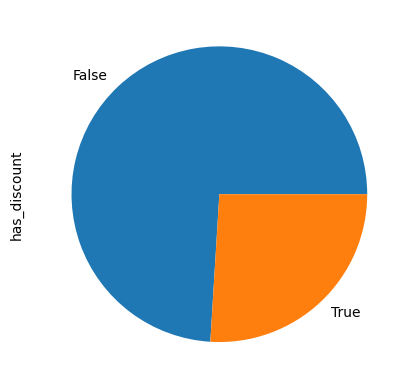

In [147]:
df.has_discount.value_counts().plot.pie();

## Ethical considerations

**You can scrape it, should you though?**


*Here's a good summary of practices for ethical web scraping:*

- Respect the rules: Always check the website's robots.txt file and terms of service (TOS) first. These will tell you if scraping is allowed and what data you can access.
- Be a good guest: Don't overload the website with requests. Space out your scraping requests and be gentle on the server. Avoid scraping during peak hours.
- Identify yourself: Use a user-agent string to identify your scraper as a bot. This allows the website owner to contact you if there are any issues.
- Public data only: Focus on scraping publicly available information, not private user data or sensitive content.
- Check for APIs: Many websites offer APIs (Application Programming Interfaces) that allow you to access data programmatically. This is often the preferred method as it avoids scraping altogether.

- Minimize data collection: only save the data I absolutely need from your page to fulfill my purpose. This helps protect your privacy and bandwidth.

- Inspecting the **robots.txt** file: Always inspect the website's *robots.txt* file for rules about what pages can be scraped, indexed, etc.

### What is a robots.txt?

A simple text file placed on the web server which tells crawlers which file they can and cannot access. It's also called _The Robots Exclusion Protocol_.

<img src='https://github.com/nestauk/im-tutorials/blob/3-ysi-tutorial/figures/Web-Scraping/robots.png?raw=1' width="600">

#### Some examples

In [21]:
print(requests.get('https://www.nesta.org.uk/robots.txt').text)
print('-----')
print(requests.get('https://www.boxofficemojo.com/robots.txt').text)
print('-----')
try:
    print(requests.get('https://www.howtogeek.com/robots.txt').text)
except :
    print("Error due to hottogeek.com is blocking us")

User-Agent: *

Disallow: /search/

Allow: /

-----
# robots.txt for BoxOfficeMojo
User-agent: *
Allow: /

-----
Error due to hottogeek.com is blocking us


### How to get around the blocking?
- Let's use fake user info by defining a header

In [24]:
headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 6.0; WOW64; rv:24.0) Gecko/20100101 Firefox/24.0' }

print(requests.get('https://www.howtogeek.com/robots.txt', headers=headers).text)

User-agent: *
Disallow: /pixel.png*
Disallow: /search/
Disallow: /profile/
User-agent: GPTBot
Disallow: /
Sitemap: https://www.howtogeek.com/sitemap.xml




#### What's a User-Agent?

A User-Agent is a string identifying the browser and operating system to the web server. It's your machine's way of saying _Hi, I am Chrome on macOS_ to a web server.

Web servers use user agents for a variety of purposes:
* Serving different web pages to different web browsers. This can be used for good – for example, to serve simpler web pages to older browsers – or evil – for example, to display a “This web page must be viewed in Internet Explorer” message.
* Displaying different content to different operating systems – for example, by displaying a slimmed-down page on mobile devices.
* Gathering statistics showing the browsers and operating systems in use by their users. If you ever see browser market-share statistics, this is how they’re acquired.

Let's break down the structure of a human-operated User-Agent:

```Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B405```

The components of this string are as follows:

* Mozilla/5.0: Previously used to indicate compatibility with the Mozilla rendering engine.
* (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us): Details of the system in which the browser is running.
* AppleWebKit/531.21.10: The platform the browser uses.
* (KHTML, like Gecko): Browser platform details.
* Mobile/7B405: This is used by the browser to indicate specific enhancements that are available directly in the browser or through third parties. An example of this is Microsoft Live Meeting which registers an extension so that the Live Meeting service knows if the software is already installed, which means it can provide a streamlined experience to joining meetings.

When scraping websites, it is a good idea to include your contact information as a custom **User-Agent** string so that the webmaster can get in contact. For example:

In [ ]:
headers = {
    'User-Agent': 'Kostas Stathoulopoulos bot',
    'From': 'konstantinos.stathoulopoulos@nesta.org.uk'
}
request = requests.get('https://www.nesta.org.uk/', headers=headers)
print(request.request.headers)

## Advanced web scraping tools

**[Scrapy](https://scrapy.org)** is a Python framework for large scale web scraping. It gives you all the tools you need to efficiently extract data from websites, process them as you want, and store them in your preferred structure and format.

**[Selenium](https://selenium-python.readthedocs.io/index.html)** is an umbrella project encapsulating a variety of tools and libraries enabling web browser automation. Selenium specifically provides infrastructure for the W3C WebDriver specification — a platform and language-neutral coding interface compatible with all major web browsers. We can use it to imitate a user's behaviour and interact with Javascript elements (buttons, sliders etc.).

For now, let's see how Selenium works.

### How to install Selenium
1. If you are using Anaconda: `conda install -c conda-forge selenium `
2. Download the driver for your web browser for [here](https://selenium-python.readthedocs.io/installation.html#drivers). **Note:** Choose a driver that corresponds to your web browser's version. Unzip the file and move the executable to your working directory.

#### Important note on Selinium and web drivers
If you are running this notebook locally, follow the above steps and run the code directly below (change the path to where your web driver is located). If you are running this notebook on colab, skip the next cell and run the one below it.

### Scraping data with Selenium

<img src='../../../images/scraping/selenium-pipeline.png' width='1024'>

In [ ]:
# install selenium if it isn't already installed
!pip install selenium

since version 4.6.0 you do not need to download a driver

In [1]:
from selenium import webdriver
# open a chrome page
driver = webdriver.Chrome() # you do not need to download the webdriver for selenium version 4.6+
driver.get("https://www.google.com/")
driver.quit() # close the page

Now let's try something more meaningful, Some websites deliver their content in a dynamic manner, resulting in a varied appearance every time they are accessed through a browser. The HTML content observed through your browser's element inspection might not be present when using `requests` and `BeautifulSoup`, as it can be generated on-the-fly when accessed.

In [4]:
#youtube is one of these dynamic pages
query = "data science"
youtube_search = "https://www.youtube.com/results?search_query="
youtube_query = youtube_search + query.replace(' ', '+')

In [11]:
#let's first try to capture it using Beautiful Soup
page = requests.get(youtube_query).text
soup = BeautifulSoup(page)
soup.find('div', id='contents')

As Expected contents is genrated dynamically so a simple get request does not work now let's use selenium to interact with the website in question

In [13]:
# Let's load the page with Selenium THEN parse the page's HTML with BeautifulSoup.
driver = webdriver.Chrome()
driver.get(youtube_query) # open the youtube page

Now we can parse the page to get the content using BeautifulSoup

In [17]:
soup = BeautifulSoup(driver.page_source) #parsing the page captured by the driver

contents_div = soup.find('div', id='contents')
for title in contents_div.find_all('a', id='video-title'):
    print(title.text.strip())

What is Data Science?
Data Analytics vs Data Science
Intro to Data Science: What is Data Science?
Data Science Full Course - Learn Data Science in 10 Hours | Data Science For Beginners | Edureka
Demystifying Data Science | Mr.Asitang Mishra | TEDxOakLawn
Data Science In 5 Minutes | Data Science For Beginners | What Is Data Science? | Simplilearn
The most important skills of data scientists | Jose Miguel Cansado | TEDxIEMadrid
Scientific Methods of Data Science: The Basics with Liam Dermody - nyhackr March Meetup
Complete Statistics For Data Science In 6 hours By Krish Naik
Data Scientist vs Data Analyst - Which Is Right For You? (2024)
Complete Data Science RoadMap For Beginners 2024 | What is Data Science? | Jobs, Salary, Career #pw
Starting a Career in Data Science (10 Thing I Wish I Knew…)
Data Analyst Vs Data Scientist, and Business Analyst | Differences, Role, Skills, Salary
Data Science Roadmap 2024 | Data Science Weekly Study Plan | Free Resources to Become Data Scientist
AI VS 

In [21]:
# number of titles
contents_div = soup.find('div', id='contents')
len(contents_div.find_all('a', id='video-title'))

21

**Actions using Selenium**

Now we can interact with the website let's try some actions!!

Also note that any actions you do to the website manually can also be captured by the driver and parsed but its always better to automate actions since most to the time you will not be working on only an Ad-Hoc request.

**Interactions in Selenium**

Selenium allows us to engage with web pages directly. This includes actions such as:

- clicking,
- typing into input fields,
- scrolling,
- dragging and dropping, among others.

To access additional data science video titles, it's necessary to scroll to the bottom of the page, prompting more videos to appear.

In [19]:
import time

for i in range(5):
    #Scroll
    driver.execute_script(
        "window.scrollTo(0, document.documentElement.scrollHeight);" #Alternatively, document.body.scrollHeight
    )
    
    #Wait for page to load increase it if you have bad internet connection
    time.sleep(3)

In [22]:
soup = BeautifulSoup(driver.page_source) #parse the new page
# number of titles
contents_div = soup.find('div', id='contents')
len(contents_div.find_all('a', id='video-title'))

141

Note the increase in the titles now that we scrolled

Now let's try something slightly more advanced
Let's try search with a new keyword
The steps should be as follows:

1. Capture the search box
2. Clear it from the old search
3. Assign a new search phrase for it
4. Hit Enther to run the search
5. Parse the page to get the new titles

In [31]:
from selenium.webdriver.common.keys import Keys

# find the search box id using the inspect element then use it as follows to select the element
search_box = driver.find_element("xpath","//input[@id='search']") 

#clear the current search
search_box.clear()

#input new search
search_box.send_keys("Saudi 2030"+ Keys.ENTER) # update the search box and click enter

#hit enter
search_box.send_keys(Keys.RETURN)  

time.sleep(3)

#### Notes

- Any changes in the page such as expanding the window size may result in a different elements being visible
- Check [here](https://www.w3schools.com/xml/xpath_syntax.asp) for additonal help writing xpath selectors.

- To select multiple elements, just switch to `driver.find_elements(...)`, which will return a list of matching elements.

- You can also access elements by id, name, etc.  Check [the docs](https://selenium-python.readthedocs.io/locating-elements.html) for more options.